# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


In [1]:
try:
    from google.colab import files, drive
    
    USE_COLAB = True
except:
    USE_COLAB = False

if USE_COLAB:
    import os
    print("Don't forget to avoid disconnections:")
    print("""
function ClickConnect(){
    console.log("Clicking"); 
    document.querySelector("colab-connect-button").click() 
}
setInterval(ClickConnect,60000)
    """)

Don't forget to avoid disconnections:

function ClickConnect(){
    console.log("Clicking"); 
    document.querySelector("colab-connect-button").click() 
}
setInterval(ClickConnect,60000)
    


In [3]:
MOUNT_DIR = '/content/drive' # In case Colab Usage
if USE_COLAB:
    drive.mount(MOUNT_DIR)
    DRIVE_DIR = os.path.join(MOUNT_DIR, 'My Drive')
    print(f"Drive directory is {DRIVE_DIR}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive directory is /content/drive/My Drive


In [5]:
if USE_COLAB:
    !pip install -q kaggle
    !mkdir ~/.kaggle
    kaggle_file = os.path.join(DRIVE_DIR, 'constants/kaggle.json')
    !cp "$kaggle_file" ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download -c avito-category-prediction


 96% 273M/284M [00:07<00:00, 39.0MB/s]
100% 284M/284M [00:07<00:00, 41.5MB/s]
 70% 5.00M/7.17M [00:00<00:00, 18.8MB/s]
100% 7.17M/7.17M [00:00<00:00, 23.9MB/s]
 99% 832M/843M [00:14<00:00, 74.7MB/s]
100% 843M/843M [00:14<00:00, 59.4MB/s]


In [7]:
!unzip -o  test.csv.zip -d  avito-text-classification > /dev/null
!unzip -o  train.csv.zip -d  avito-text-classification > /dev/null

Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('avito-text-classification/train.csv')
test = pd.read_csv('avito-text-classification/test.csv')

In [5]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

Для трейна:

In [6]:
 train.isna().sum()

title            0
description      2
Category_name    0
Category         0
dtype: int64

In [7]:
train.fillna("", inplace=True)

In [8]:
 train.isna().sum()

title            0
description      0
Category_name    0
Category         0
dtype: int64

Для теста:

In [9]:
test.isna().sum()

title          0
description    1
itemid         0
dtype: int64

In [10]:
test.fillna("", inplace=True)

In [11]:
test.isna().sum()

title          0
description    0
itemid         0
dtype: int64

## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [12]:
train['description'] = train['title'] + " " + train['description']
train.drop('title', axis='columns', inplace=True)
train.head()

,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 ...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год Продам/\n Фот...,Бытовая техника,21
2,Возвму машину с выкупом Возьму машину в аренду...,Предложение услуг,114
3,"Полусапожки полусапожки в отличном состоянии, ...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные Кожаные(натур) босоножки Kar...,"Одежда, обувь, аксессуары",27


In [13]:
test['description'] = test['title'] + " " + test['description']
test.drop('title', axis='columns', inplace=True)
test.head()

,description,itemid
0,Мастерка Мастерка фирмы форвард. Белого цвета....,1778449823
1,"Зимние сапоги Продаю зимние сапоги, в хорошем ...",1677656962
2,Видеонаблюдение 8 камер В комплект Atis AMD-2M...,1758182804
3,Запчасти для GLE Запчасти GLE,1689811299
4,Бластер nerf Состояние 5+/\nПродаю потому что ...,1804706240


## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

Уникальных классов:

In [14]:
num = len(set(train['Category']))
num

50

Диаграмма:

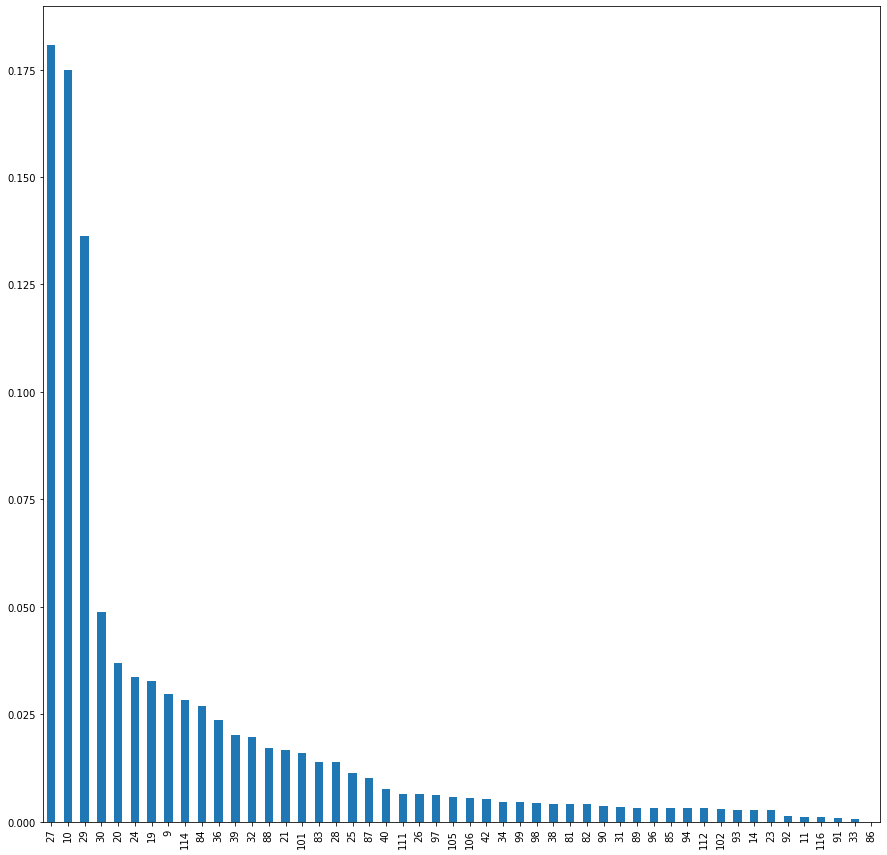

In [16]:
plt.figure(figsize = [15, 15])
train['Category'].value_counts(normalize=True).plot.bar()
plt.show()

Дисбаланс заметен. Ярко выделяются три класса (27, 10, 29) с самыми большими долями - примерно 18.3%, 17.5% и 13.8% соответственно. При этом есть близкие к нулю (или равные нулю) доли - у классов 92, 11, 116, 91, 33 и - особенно - 86

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train['description'])
X.shape

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [21]:
from_number = list(filter(lambda x: x[0].isnumeric(), vectorizer.vocabulary_.keys()))
len(from_number)

610956

In [23]:
import string
from_punctuation = list(filter(lambda x: x[0] in string.punctuation, vectorizer.vocabulary_.keys()))
len(from_punctuation)

2043

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [24]:
import nltk
import re
import snowballstemmer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
from tqdm import tqdm
def tokenizer(text):
    text = text.lower()
    tokenized = nltk.word_tokenize(text)
    selected = []
    stemmer = snowballstemmer.stemmer('russian')
    for token in tokenized:
        if re.sub(f"[a-zA-Zа-яА-Я]+", "", token) == '':
            selected.append(token)

    selected = list(set(selected) - set(stopwords.words("russian")))
    selected = [stemmer.stemWord(token) for token in selected]
    return selected


In [49]:
tokenizer(train['description'][0])

['dci',
 'аппаратур',
 'канг',
 'мозг',
 'компан',
 'легальн',
 'контрактн',
 'эб',
 'союз',
 'документ',
 'компьютер',
 'рен',
 'репутац',
 'установк',
 'пробег',
 'раздел',
 'отправля',
 'delphi',
 'комплект',
 'подробн',
 'канг',
 'laguna',
 'сценик',
 'оригина',
 'kangoo',
 'дизел',
 'отличн',
 'двигател',
 'сво',
 'торгу',
 'блок',
 'лагун',
 'дорож',
 'clio',
 'налич',
 'транспортн',
 'компан',
 'двигател',
 'коммутатор',
 'состоян',
 'росс',
 'проверен',
 'renault',
 'электрон',
 'автомобил',
 'возможн',
 'год',
 'микр',
 'запчаст',
 'друг',
 'таможен',
 'предоставля',
 'запчаст',
 'гарант',
 'топливн',
 'делф',
 'micra',
 'управлен',
 'кли',
 'nissan',
 'таможен',
 'гарант',
 'мотор',
 'регион',
 'дета',
 'нисса',
 'наложн',
 'платеж',
 'мега']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите 
 на полученной выборке.
4. Посчитайте метрику accuracy

In [76]:
# 1
data_sample = train.sample(n=100000)
vectorizer = CountVectorizer(tokenizer=tokenizer)
X = vectorizer.fit_transform(data_sample['description'])
X.shape

(100000, 88910)

In [54]:
# 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data_sample["Category"], test_size=0.2)

In [57]:
# 3
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
# 4
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.82525


## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


Размер матрицы не изменился, качество ухудшилось на 0.25%

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df = 0.9)

X = vectorizer.fit_transform(data_sample['description'])
print("Matrix shape: ", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, data_sample["Category"], test_size=0.2)

clf = SGDClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

Matrix shape:  (100000, 89772)
0.82275


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

Размер марицы, конечно, изменился, а качество ухудшилось заметнее - чуть меньше, чем на 5%

В итоге самый высокий результат показал первый из трех методов.

In [77]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=tokenizer, n_features=30000)

X = vectorizer.fit_transform(data_sample['description'])
print("Matrix shape: ", X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, data_sample["Category"], test_size=0.2)

clf = SGDClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Matrix shape:  (100000, 30000)
0.80135


## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.

In [62]:
data_sample = train.sample(n=500000)
vectorizer = CountVectorizer(tokenizer=tokenizer)
X_train = vectorizer.fit_transform(data_sample['description'])
y_train = data_sample["Category"]
X_test = vectorizer.transform(test["description"])

(100000, 30000)

In [64]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [65]:
y_pred = clf.predict(X_test)
test["Category"] = y_pred

In [67]:
test.head()

,description,itemid,Category
0,Мастерка Мастерка фирмы форвард. Белого цвета....,1778449823,27
1,"Зимние сапоги Продаю зимние сапоги, в хорошем ...",1677656962,29
2,Видеонаблюдение 8 камер В комплект Atis AMD-2M...,1758182804,32
3,Запчасти для GLE Запчасти GLE,1689811299,10
4,Бластер nerf Состояние 5+/\nПродаю потому что ...,1804706240,30


In [71]:
to_submit = test[["itemid", "Category"]]
to_submit.columns = ["Id", "Category"]
to_submit.to_csv("submission.csv", index=False)

In [73]:
!kaggle competitions submit -c avito-category-prediction -f submission.csv -m "First attempt"

100% 18.7M/18.7M [00:05<00:00, 3.87MB/s]
Successfully submitted to Avito Category Prediction